In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [2]:
def load_and_preprocess_image(img_path, target_size=(200, 200)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

In [3]:
def plot_image(img_path):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [4]:
def predict_driver_status(img_path, model, target_size=(200, 200)):
    """
    Loads an image, predicts the class with the model,
    and prints whether the driver is focused or distracted.
    Also shows the image.
    """
    # Load & preprocess
    img_array = load_and_preprocess_image(img_path, target_size=target_size)

    # Predict
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]

    # Show image (use either plot_image or display)
    plot_image(img_path)  # OR:
    # display(IPImage(img_path))

    # Classify
    if predicted_class_index == 0:
        print(f" Prediction: Driver is FOCUSED (c0)")
    else:
        print(f" Prediction: Driver is DISTRACTED (c{predicted_class_index})")

    return predicted_class_index


In [5]:
model = load_model('best_model.keras')

In [6]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 198, 198, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 97, 97, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 46, 46, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    34,669,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,304,096 (397.89 MB)

 Trainable params: 34,767,882 (132.63 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 69,535,766 (265.26 MB)

In [7]:
import os
import shutil

# Loop through all classes c0 to c9
for i in range(10):
    class_name = f"c{i}"
    source = f"train/{class_name}"
    dest = f"test/{class_name}"

    # Make sure the destination exists
    os.makedirs(dest, exist_ok=True)

    # List images in train/class
    files = os.listdir(source)
    print(f"{class_name} has {len(files)} files in train.")

    # Copy first 5 images only
    for file_to_copy in files[:5]:
        shutil.copy(
            os.path.join(source, file_to_copy),
            os.path.join(dest, file_to_copy)
        )

    print(f"Copied {min(5, len(files))} images to {dest}")

print("Done! Your test folders now have sample images.")



c0 has 2489 files in train.
Copied 5 images to test/c0
c1 has 2267 files in train.
Copied 5 images to test/c1
c2 has 2317 files in train.
Copied 5 images to test/c2
c3 has 2346 files in train.
Copied 5 images to test/c3
c4 has 2326 files in train.
Copied 5 images to test/c4
c5 has 2312 files in train.
Copied 5 images to test/c5
c6 has 2325 files in train.
Copied 5 images to test/c6
c7 has 2002 files in train.
Copied 5 images to test/c7
c8 has 1911 files in train.
Copied 5 images to test/c8
c9 has 2129 files in train.
Copied 5 images to test/c9
Done! Your test folders now have sample images.


In [8]:
print(os.listdir('test/c8'))

['img_100015.jpg', 'img_100235.jpg', 'img_100295.jpg', 'img_100368.jpg', 'img_100446.jpg']


In [9]:
img_path = "test/c6/img_100036.jpg"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


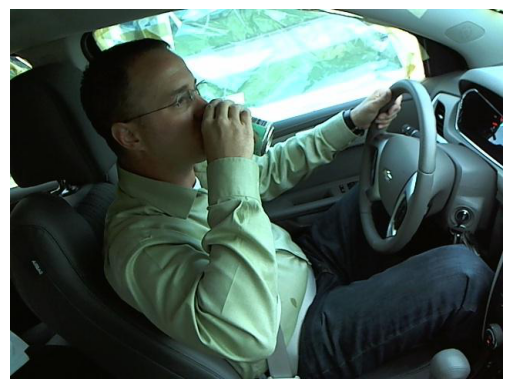

 Prediction: Driver is DISTRACTED (c6)


6

In [10]:
predict_driver_status(img_path, model)

In [11]:
# c0: normal driving
# c1: texting - right
# c2: talking on the phone - right
# c3: texting - left
# c4: talking on the phone - left
# c5: operating the radio
# c6: drinking
# c7: reaching behind
# c8: hair and makeup
# c9: talking to passenger